In [45]:
include("./params.jl")
using JSON
using CSV, DataFrames
using Plots
using Statistics

In [46]:
datapath = "L400/"
fn_config = "config-sample"

"config-sample"

In [47]:
config  = JSON.parsefile(fn_config)
params = readconfig(config)

Params
  L: Int64 400
  θ: Array{Float64}((1,)) [0.25]
  W: Array{Float64}((1,)) [0.0]
  E_edges: Array{Float64}((101,)) [1.0e-10, 1.2589254117941662e-10, 1.584893192461111e-10, 1.9952623149688828e-10, 2.511886431509582e-10, 3.1622776601683795e-10, 3.9810717055349694e-10, 5.011872336272714e-10, 6.309573444801942e-10, 7.943282347242822e-10  …  0.12589254117941673, 0.15848931924611134, 0.19952623149688797, 0.251188643150958, 0.31622776601683794, 0.3981071705534972, 0.5011872336272722, 0.6309573444801932, 0.7943282347242815, 1.0]
  seed: Int64 1234
  R: Int64 10000
  V: Float64 1.0
  num_blas: Int64 1
  energy_path: String "energyfile"


In [48]:
function get_datafn(i, j)
    return "Th$(lpad(i, 2, "0"))_W$(lpad(j, 2, "0")).csv"
end

get_datafn (generic function with 2 methods)

In [49]:
df = [CSV.read(datapath*get_datafn(i, j), DataFrame) for i in 1:length(params.θ), j in 1:length(params.W)]

1×1 Matrix{DataFrame}:
 100×4 DataFrame
 Row │ E            E_idx  weight  dos        
     │ Float64      Int64  Int64   Float64    
─────┼────────────────────────────────────────
   1 │ 4.67301e-11      1      51  4.7607e12
   2 │ 5.88297e-11      2      54  4.004e12
   3 │ 7.40622e-11      3      58  3.41608e12
   4 │ 9.32388e-11      4      76  3.55561e12
   5 │ 1.17381e-10      5      75  2.78716e12
   6 │ 1.47774e-10      6      75  2.21392e12
   7 │ 1.86036e-10      7      73  1.71168e12
   8 │ 2.34205e-10      8      74  1.37826e12
   9 │ 2.94847e-10      9      92  1.36109e12
  10 │ 3.7119e-10      10     109  1.28093e12
  11 │ 4.67301e-10     11     105  9.80144e11
  ⋮  │      ⋮         ⋮      ⋮         ⋮
  91 │ 0.0467301       91   71464  6.67095e6
  92 │ 0.0588297       92   86066  6.38164e6
  93 │ 0.0740622       93  104709  6.16715e6
  94 │ 0.0932388       94  127694  5.97408e6
  95 │ 0.117381        95  155563  5.78105e6
  96 │ 0.147774        96  192225  5.67427e6
  97 

In [50]:
df1 = df[1]

,E,E_idx,weight,dos
,Float64,Int64,Int64,Float64
1,4.67301e-11,1,51,4.7607e12
2,5.88297e-11,2,54,4.004e12
3,7.40622e-11,3,58,3.41608e12
4,9.32388e-11,4,76,3.55561e12
5,1.17381e-10,5,75,2.78716e12
6,1.47774e-10,6,75,2.21392e12
7,1.86036e-10,7,73,1.71168e12
8,2.34205e-10,8,74,1.37826e12
9,2.94847e-10,9,92,1.36109e12


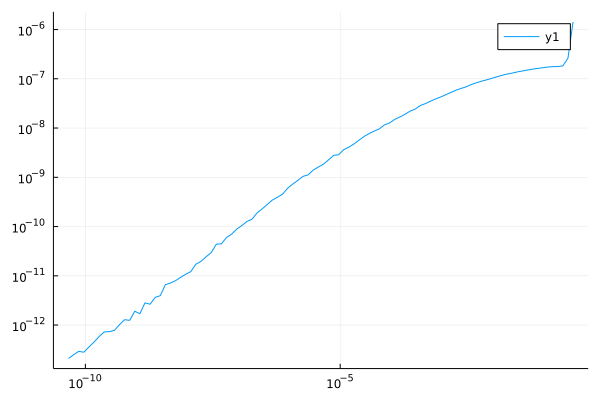

In [57]:
plot(df1.E, 1 ./ df1.dos, xaxis =:log10, yaxis = :log10)